<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn
from scipy import stats as st

In [37]:
BLUE = '#35A7FF'
RED = '#FF5964'
GREEN = '#6BF178'
YELLOW = '#FFE74C'

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
dataset = pd.read_csv('hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [4]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [5]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

In [6]:
idataset = dataset[important_cols]
idataset

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


Capturo la muestra de un año en particular para poder comparar las variables de ese año. Tomamos el 2016 ya que en ese año se encuentra la mayor cantidad de paises.

In [7]:
ydataset = idataset[idataset['year']==2016]
ydataset[:5]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0


## 1. Estadísticos descriptivos

1- Para comenzar con un pantallazo de los datos, calcular el rango de las variables.

In [8]:
# solo muestra variables cuantitativas
ydataset.describe()

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
count,162.0,103.000000,158.000000,159.000000,159.000000,162.000000,162.000000,162.000000,149.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,2016.0,6.310680,7.183544,7.358491,7.279874,6.635802,7.808642,7.222222,7.449664,6.976337,6.795062,81.271605,6.889871,81.179012
std,0.0,3.635417,4.007697,3.889751,3.819334,4.723085,4.130682,4.132886,3.704337,3.089252,0.886026,46.964242,1.079601,46.941076
min,2016.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.880000,1.000000,3.765827,1.000000
25%,2016.0,7.000000,5.000000,5.000000,5.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.260000,41.250000,6.246463,41.250000
50%,2016.0,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.000000,6.905000,81.500000,6.823996,81.500000
75%,2016.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.250000,7.467500,121.750000,7.771945,121.250000
max,2016.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.970000,162.000000,8.887410,162.000000


In [9]:
# minimos y maximos de variables cuantitativas
ydataset.describe().loc[['min','max']]

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
min,2016.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.88,1.0,3.765827,1.0
max,2016.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,8.97,162.0,8.887410,162.0


In [10]:
# obtengo el rango
v_range = ydataset.describe().loc[['min','max']]
v_range.loc['range'] = v_range.loc['max'] - v_range.loc['min'] 
v_range.T # T: Transpose index and columns

,min,max,range
year,2016.000000,2016.00000,0.000000
pf_identity_legal,0.000000,10.00000,10.000000
pf_identity_parental_marriage,0.000000,10.00000,10.000000
pf_identity_parental_divorce,0.000000,10.00000,10.000000
pf_identity_parental,0.000000,10.00000,10.000000
pf_identity_sex_male,0.000000,10.00000,10.000000
pf_identity_sex_female,0.000000,10.00000,10.000000
pf_identity_sex,0.000000,10.00000,10.000000
pf_identity_divorce,0.000000,10.00000,10.000000
pf_identity,0.000000,10.00000,10.000000


# **Observación de los datos**

* Los rangos de las variables en las que nos enfoncamos (Personal Freedom) es de 10.
* Las variables ef_score y hf_score parecen corresponder a un promedio resultante de todas las variables de esos grupos, es decir ef y hf, su rango es de 6.01(ef) y 5.12(hf).
* Y por ultimo las variables ef_rank y hf_rank corresponde al ranking en que se ubica cada pais de los 162 paises en cuanto a su score de cada tipo(ef y hf) y su rango es 161.

2- Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 

In [11]:
LATAMCARIBE = 'Latin America & the Caribbean'
latamdataset = ydataset[ydataset['region'] == LATAMCARIBE]
pd.concat([latamdataset[['pf_identity','hf_score']].mean(),
           ydataset[['pf_identity','hf_score']].mean()],axis=1).rename(columns={0:'Media LatAm',
                                                                                1:'Media Mundo'})

,Media LatAm,Media Mundo
pf_identity,8.016026,6.976337
hf_score,6.954305,6.889871


In [12]:
pd.concat([latamdataset[['pf_identity','hf_score']].median(),
           ydataset[['pf_identity','hf_score']].median()],axis=1).rename(columns={0:'Mediana LatAm',
                                                                                  1:'Mediana Mundo'})

,Mediana LatAm,Mediana Mundo
pf_identity,7.500000,8.000000
hf_score,6.998125,6.823996


In [13]:
pd.concat([latamdataset[['pf_identity','hf_score']].std(),
           ydataset[['pf_identity','hf_score']].std()],axis=1).rename(columns={0:'D.E LatAm',
                                                                               1:'D.E Mundo'})

,D.E LatAm,D.E Mundo
pf_identity,1.784893,3.089252
hf_score,0.705186,1.079601


Calcular la moda no tiene sentido para el hf_score ya que depende del promedio de otras variables, lo tomamos como un dato continuo. Diferente es el caso de pf_identity que podrìa llegar a utilizar la moda para comparar cuál fué el puntaje más utilizado o repetido de libertad de identidad de la regíon.

In [14]:
vmoda = pd.concat([latamdataset[['pf_identity']].mode().loc[0],
                   ydataset[['pf_identity']].mode().loc[0]], axis=1)
vmoda.columns = ['Moda LatAm', 'Moda Mundo']
vmoda

,Moda LatAm,Moda Mundo
pf_identity,10.0,9.25


Podemos observar según la moda que lo más común es el valor máximo de libertad de identidad tanto para Latino América y el Caribe como en el Mundo entero.

3- ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?

Son comparables ya que la libertad personal influye directamente sobre el puntaje de pf_score que forma la libertad humana, forma parte de ese cálculo al igual que las variables de libertad económica. Esto siempre que se tenga en cuenta la comparación de esas variables en un mismo año.

4- ¿Cómo pueden sanearse los valores faltantes?

Los valores NaN pueden sanearse reemplazandolos con un valor igual a la media de la variable o como otra opción quitándolos del dataset y reduciendo la muestra.

In [15]:
ydataset = ydataset[ydataset.hf_score.notna()]
idataset = idataset[idataset.hf_score.notna()]

5- ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

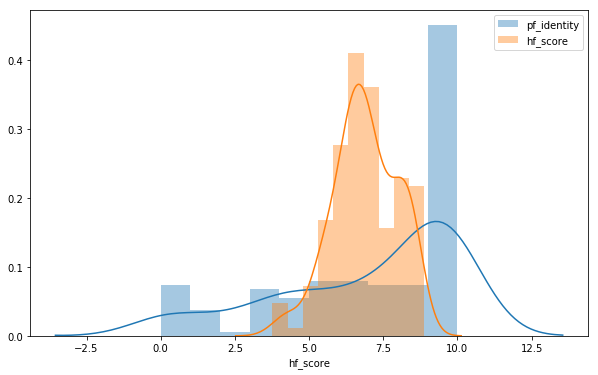

In [16]:
plt.figure(figsize=(10,6))
seaborn.distplot(ydataset['pf_identity'].dropna(), bins=10, label='pf_identity')
seaborn.distplot(ydataset['hf_score'].dropna(), bins=10, label='hf_score')
plt.legend()

En el histograma no se observan irregularidades o valores muy distantes de la escala, pero podemos utilizar boxplots para detectar mejor los outliers.

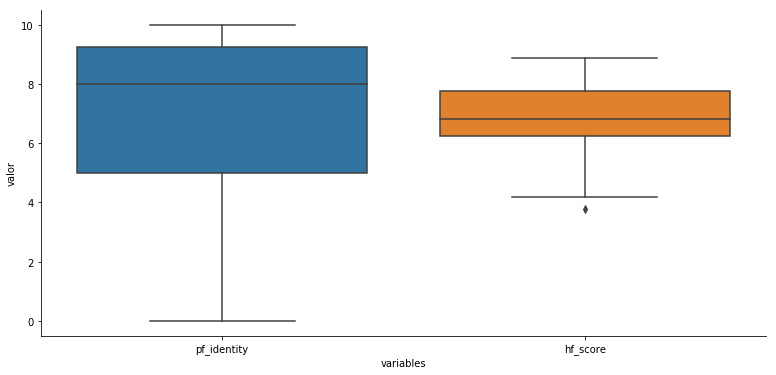

In [17]:
plt.figure(figsize=(13,6))
vmundo = pd.melt(ydataset,id_vars=['year','region','countries'],
                    value_vars=['pf_identity', 'hf_score'],
                    var_name='variables',
                    value_name='valor')
seaborn.boxplot(data=vmundo, x='variables', y='valor')
seaborn.despine()

Observamos outliers en el hf_score a nivel mundial.

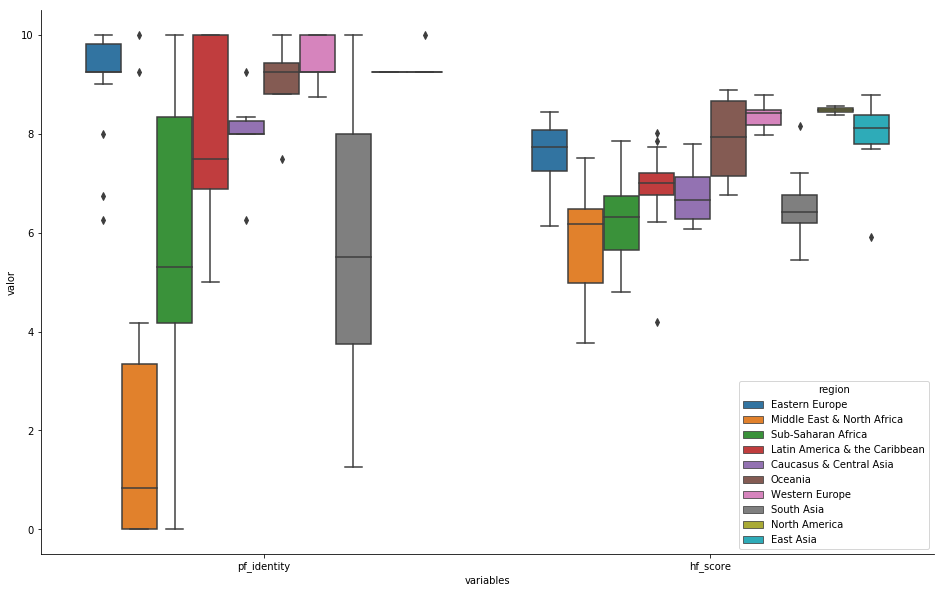

In [18]:
plt.figure(figsize=(16,10))
vmundo = pd.melt(ydataset,id_vars=['year','region','countries'],
                    value_vars=['pf_identity', 'hf_score'],
                    var_name='variables',
                    value_name='valor')
seaborn.boxplot(data=vmundo, x='variables', y='valor', hue='region')
seaborn.despine()
#no sé que devuelve esto. Salvame jebus

<h4>Conclusion</h4>
    
Si bien encontramos outliers a nivel mundial en el puntaje de human freedom, por la índole de los datos, puede estar relacionado a eventos particulares(golpes de estado, guerras, atentados, bloqueos economicos)  que sufrieron paises de algunas regiones en un momento dado, por eso al ser un dato histórico no es conveniente eliminar esos outliers.
Por otro lado observando por grupo se pueden distinguir outliers en las distintas regiones:
1. para la libertad de identidad encontramos en el este de Europa, medio este y norte de Africa, Caucasios y Asia Central, en Oceania y en Asia del Este.
2. para la libertad humana encontramos outliers en Latinoamerica y el Caribe, como en el Sur y Este de Asia.

## 2. Agregación de datos

1- Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.

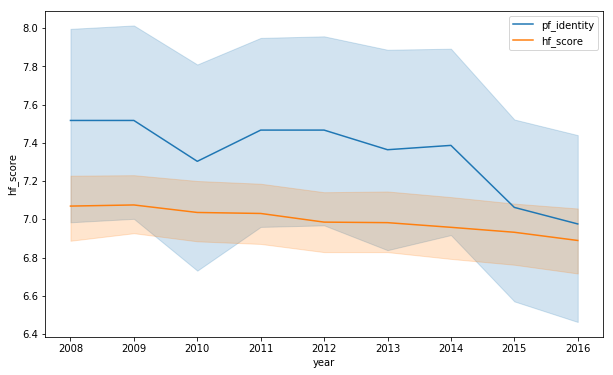

In [19]:
plt.figure(figsize=(10,6))
seaborn.lineplot(data=idataset, x='year', y='pf_identity', label='pf_identity')
seaborn.lineplot(data=idataset, x='year', y='hf_score', label='hf_score')
plt.legend()

2- Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?

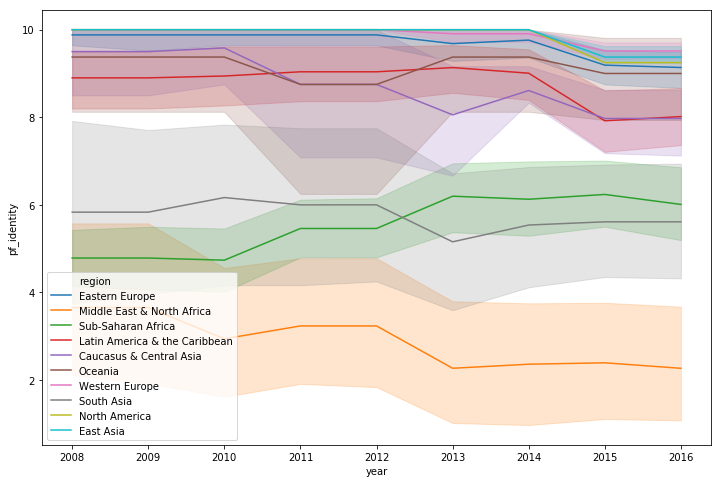

In [20]:
plt.figure(figsize=(12,8))
seaborn.lineplot(data=idataset, x='year', y='pf_identity', hue='region')

<h4>Pf_identity</h4>
A simple vista se distingue que la tendencia de la libertad de identidad está más marcada hacia la baja sin dividir en regiones, pero tambien al separarla podemos observar que hay regiones con una tendencia distinta a lo observado en el total del mundo. Por ejemplo Sub-Saharan Africa y Oceania o Latam y Asia Central independientemente se ve como su tendencia va hacia un mejor puntaje.

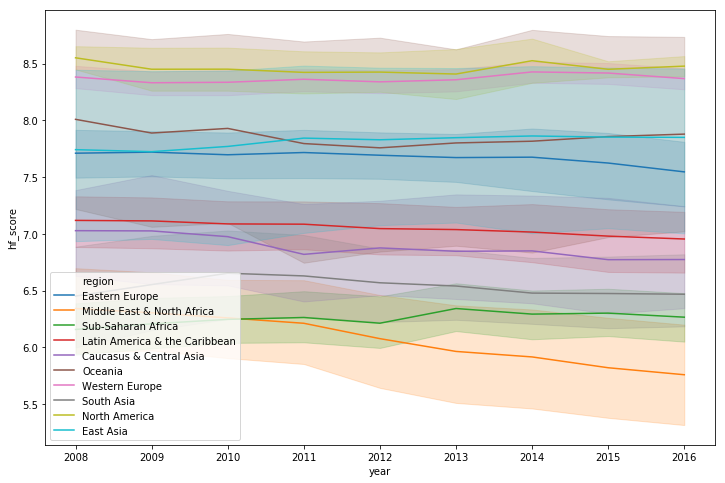

In [21]:
plt.figure(figsize=(12,8))
seaborn.lineplot(data=idataset, x='year', y='hf_score', hue='region')

<h4>Hf_score</h4>
En este caso no hay mucha variación comparando con el grafico de hf_score del mundo, se observa la tendencia a mermar el score tanto por cada región como en el mundo.

3- Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?


## 3. Distribuciones

1- Graficar en un mismo histograma la distribución de la variable pf_identity en global, y en Latinoamérica y el caribe. Repetir para la variable hf_score. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?

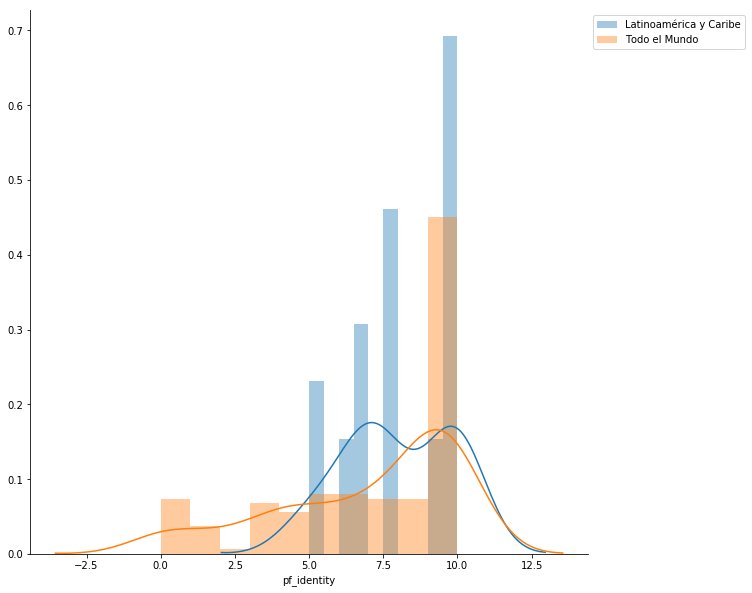

In [22]:
plt.figure(figsize=(10,10))
seaborn.distplot(latamdataset['pf_identity'].dropna(),bins=10, label='Latinoamérica y Caribe')
seaborn.distplot(ydataset['pf_identity'].dropna(),bins=10, label='Todo el Mundo')
plt.legend(bbox_to_anchor=(1, 1))
seaborn.despine()

En esta variable vemos una clara distribución asimétrica sesgada hacia la derecha para Todo el mundo. Y para América Latina se ve similar a una distribución binomial.

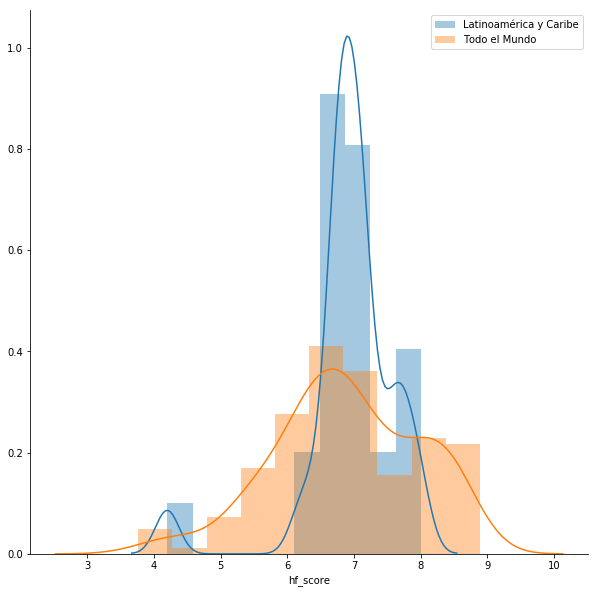

In [23]:
plt.figure(figsize=(10,10))
seaborn.distplot(latamdataset['hf_score'].dropna(),bins=10, label='Latinoamérica y Caribe')
seaborn.distplot(ydataset['hf_score'].dropna(),bins=10, label='Todo el Mundo')
plt.legend(bbox_to_anchor=(1, 1))
seaborn.despine()

La distribución para esta variable es más cercana a una normal, en Latino América se resaltan los outliers de la izquierda. Para Todo el mundo la variable presenta una forma más acampanada, también similar a una normal.

2- Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.

Tomaremos la muestra de Latinoamérica.

In [24]:
#H0: Los datos analizados siguen una distribución M.
#H1: Los datos analizados no siguen una distribución M.
#z=(valor observado - media ) / varianza

#primero ajusto mean = 0 y std = 1 de cada variable para mi hipótesis H0.
hip_mean_pf, hip_std_pf = st.norm.fit(latamdataset.pf_identity)
hip_mean_hf, hip_std_hf = st.norm.fit(latamdataset.hf_score)

#aplico la fórmula
zlatam_pf = (latamdataset.pf_identity - hip_mean_pf)/hip_std_pf
zlatam_hf = (latamdataset.hf_score - hip_mean_hf)/hip_std_hf

In [25]:
st.kstest(zlatam_pf, 'norm')

KstestResult(statistic=0.21766205242776648, pvalue=0.14630354066845766)

In [26]:
st.kstest(zlatam_hf, 'norm')

KstestResult(statistic=0.22822996712341367, pvalue=0.11328141492726343)

Observamos que tanto para el hf_score como para el pf_identity el p-value es distinto de 0, por lo tanto no podemos rechazar la hipótesis 0.

3- Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar ambas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.

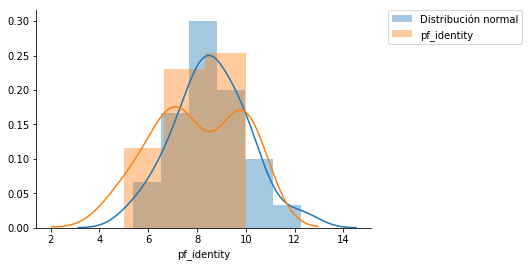

In [30]:
#Nueva distribución normal con los parametros anteriores
nd_latam_pf = st.norm(hip_mean_pf,hip_std_pf)
#Generamos muestra
latamsample = nd_latam_pf.rvs(len(latamdataset))##len = 26
#Graficamos
seaborn.distplot(latamsample, label='Distribución normal')
seaborn.distplot(latamdataset['pf_identity'], label='pf_identity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Armamos el gráfico QQ

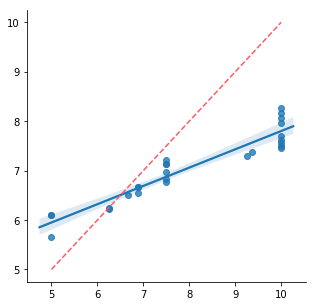

In [55]:
plt.figure(figsize=(5,5))

percs = np.linspace(0,100,len(latamdataset))
qn_sample = np.percentile(latamdataset['pf_identity'],percs)
qn_norm_dist = np.percentile(latamsample, percs)

seaborn.regplot(x=qn_sample , y=qn_norm_dist)
x = np.linspace(np.min((qn_sample.min(), qn_norm_dist.min()))
                ,np.max((qn_sample.max(), qn_norm_dist.max())))
plt.plot(x,x, color=RED, ls="--")
seaborn.despine()

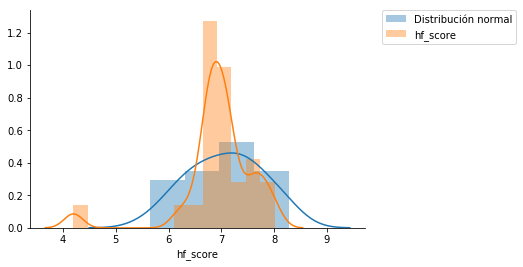

In [39]:
#Ahora para variable hf_score en LATAM
#Nueva distribución normal con los parametros anteriores
nd_latam_hf = st.norm(hip_mean_hf,hip_std_hf)
#Generamos muestra
latamsample = nd_latam_hf.rvs(len(latamdataset))##len = 26
#Graficamos
seaborn.distplot(latamsample, label='Distribución normal')
seaborn.distplot(latamdataset['hf_score'], label='hf_score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

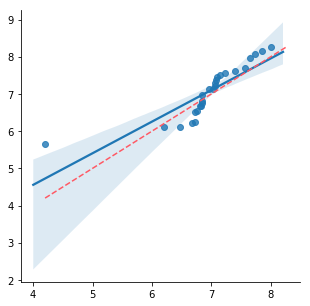

In [54]:
# QQ del hf_score para LATAM
plt.figure(figsize=(5,5))

qn_sample_hf = np.percentile(latamdataset['hf_score'],percs)
qn_norm_dist_hf = np.percentile(latamsample, percs)

seaborn.regplot(x=qn_sample_hf , y=qn_norm_dist_hf)
x = np.linspace(np.min((qn_sample_hf.min(), qn_norm_dist_hf.min()))
                ,np.max((qn_sample_hf.max(), qn_norm_dist_hf.max())))
plt.plot(x,x, color=RED, ls="--")
seaborn.despine()

Comparamos entre ambas variables para Latinoamérica

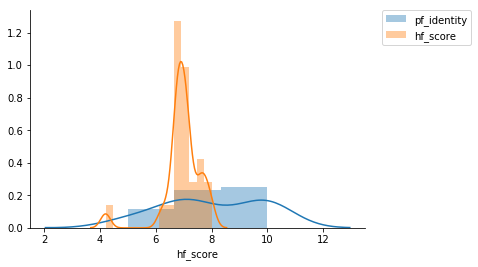

In [56]:
seaborn.distplot(latamdataset['pf_identity'], label='pf_identity')
seaborn.distplot(latamdataset['hf_score'], label='hf_score')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

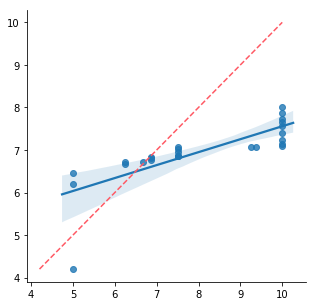

In [53]:
# QQ del hf_score vs pf_identity para LATAM
plt.figure(figsize=(5,5))

seaborn.regplot(x=qn_sample , y=qn_sample_hf)
x = np.linspace(np.min((qn_sample_hf.min(), qn_sample.min()))
                ,np.max((qn_sample_hf.max(), qn_sample.max())))
plt.plot(x,x, color=RED, ls="--")
seaborn.despine()

Observamos en este caso que no hay una correlación lineal entre las distribuciones para LATAM.

4- Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior.
¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente?

¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

## 4. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)
